Importing and cleaning Hepatitis dataset for use

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data")
df.columns =['Class', 'AGE', 'SEX', 'STEROID','ANTIVIRALS','FATIGUE','MALAISE','ANOREXIA','LIVER BIG','LIVER FIRM','SPLEEN PALPABLE','SPIDERS','ASCITES','VARICES','BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN','PROTIME','HISTOLOGY']
df = df.replace("?", np.nan)
df = df.dropna()
df = df.astype({'STEROID': 'int64', 'FATIGUE': 'int64', 'MALAISE': 'int64', 'ANOREXIA': 'int64', 'LIVER BIG': 'int64', 'LIVER FIRM': 'int64', 'SPLEEN PALPABLE': 'int64', 'SPIDERS': 'int64', 'ASCITES': 'int64', 'VARICES': 'int64', 'BILIRUBIN': 'float64', 'ALK PHOSPHATE': 'int64', 'SGOT': 'int64', 'ALBUMIN': 'float64', 'PROTIME': 'int64'})
df

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
9,2,39,1,1,1,2,2,2,1,1,2,2,2,2,1.3,78,30,4.4,85,1
10,2,32,1,2,1,1,2,2,2,1,2,1,2,2,1.0,59,249,3.7,54,1
11,2,41,1,2,1,1,2,2,2,1,2,2,2,2,0.9,81,60,3.9,52,1
12,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.2,57,144,4.9,78,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2,45,1,2,1,2,2,2,2,2,2,2,2,2,1.3,85,44,4.2,85,2
142,1,49,1,1,2,1,1,2,2,2,1,1,2,2,1.4,85,70,3.5,35,2
144,2,31,1,1,2,1,2,2,2,2,2,2,2,2,1.2,75,173,4.2,54,2
152,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


Importing and processing Messidor dataset for use

In [ ]:
import urllib.request
from io import StringIO

with urllib.request.urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/00329/messidor_features.arff') as f:
    html = f.read().decode('utf-8')
f = html.split("@")
f = f[22][5:]
TESTDATA = StringIO(f)
df2 = pd.read_csv(TESTDATA)
df2.columns =['QUALITY ASSESSMENT', 'RETINAL ABNORMALITY', 'MA ALPHA 0.5', 'MA ALPHA 0.6','MA ALPHA 0.7','MA ALPHA 0.8','MA ALPHA 0.9','MA ALPHA 1','EXUDATES 8','EXUDATES 9','EXUDATES 10','EXUDATES 11','EXUDATES 12','EXUDATES 13','EXUDATES 14','EXUDATES 15','DISTANCE','DIAMETER','AM/FM','CONTAINS DR']
# df.dtypes
df2

,QUALITY ASSESSMENT,RETINAL ABNORMALITY,MA ALPHA 0.5,MA ALPHA 0.6,MA ALPHA 0.7,MA ALPHA 0.8,MA ALPHA 0.9,MA ALPHA 1,EXUDATES 8,EXUDATES 9,EXUDATES 10,EXUDATES 11,EXUDATES 12,EXUDATES 13,EXUDATES 14,EXUDATES 15,DISTANCE,DIAMETER,AM/FM,CONTAINS DR
0,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
1,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
2,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
3,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1
4,1,1,44,43,41,41,37,29,28.356400,6.935636,2.305771,0.323724,0.000000,0.000000,0.000000,0.000000,0.502831,0.126741,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,1,1,34,34,34,33,31,24,6.071765,0.937472,0.031145,0.003115,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0,0
1146,1,1,49,49,49,49,45,37,63.197145,27.377668,8.067688,0.979548,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0,0
1147,1,0,49,48,48,45,43,33,30.461898,13.966980,1.763305,0.137858,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0,0
1148,1,1,39,36,29,23,13,7,40.525739,12.604947,4.740919,1.077570,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1,1


In [ ]:
!pip install shap

Finding most important features using SHAP value for Messidor dataset

Accuracy is 64.8


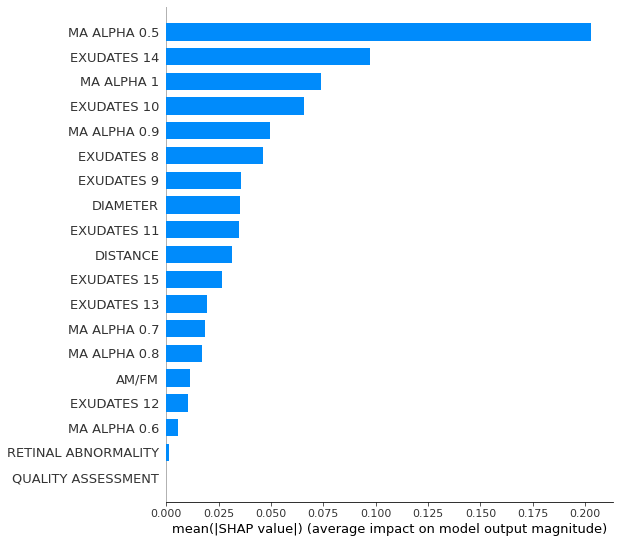

In [ ]:
import shap
import sklearn
from math import ceil
import warnings

np.random.seed(1232)
warnings.simplefilter(action='ignore', category=FutureWarning)

y = df2["CONTAINS DR"].to_numpy()
x = df2.drop('CONTAINS DR', 1).to_numpy()
# print(x)
(num_instances, num_features), num_classes = x.shape, np.max(y)+1
inds = np.random.permutation(num_instances)
#train-test split)
split = ceil(num_instances*0.8)

x_train, y_train = x[inds[:split]], y[inds[:split]]
x_test, y_test = x[inds[split:]], y[inds[split:]]

orig_model = sklearn.tree.DecisionTreeRegressor(max_depth=19)
orig_model.fit(x_train, y_train)
test2 = orig_model.predict(x_test)

explainer = shap.TreeExplainer(orig_model)
shap_values = explainer.shap_values(x_test)
vals= np.abs(shap_values).mean(0)
shap.initjs()
a=['QUALITY ASSESSMENT', 'RETINAL ABNORMALITY', 'MA ALPHA 0.5', 'MA ALPHA 0.6','MA ALPHA 0.7','MA ALPHA 0.8','MA ALPHA 0.9','MA ALPHA 1','EXUDATES 8','EXUDATES 9','EXUDATES 10','EXUDATES 11','EXUDATES 12','EXUDATES 13','EXUDATES 14','EXUDATES 15','DISTANCE','DIAMETER','AM/FM']
shap.summary_plot(shap_values, x_test, plot_type="bar",feature_names=a)
# shap.force_plot(explainer.expected_value, shap_values, x_test)

Finding most important features using SHAP value for Hepatitis dataset

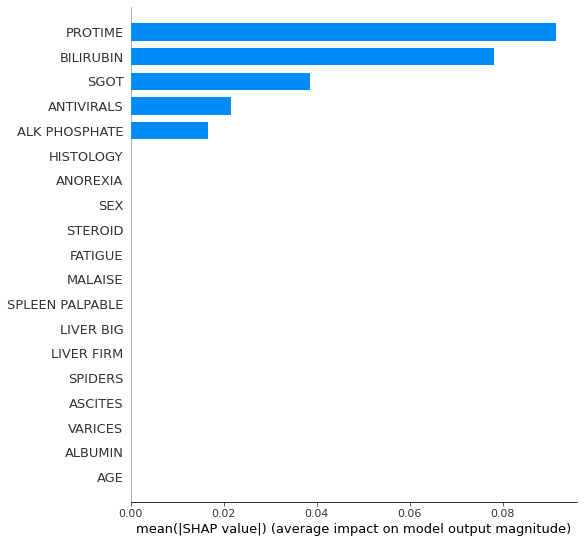

In [ ]:
import shap
import sklearn
from math import ceil
import warnings

np.random.seed(97)
warnings.simplefilter(action='ignore', category=FutureWarning)

y = df["Class"].to_numpy()
x = df.drop('Class', 1).to_numpy()

(num_instances, num_features), num_classes = x.shape, np.max(y)+1
inds = np.random.permutation(num_instances)
#train-test split)
split = ceil(num_instances*0.8)

x_train, y_train = x[inds[:split]], y[inds[:split]]
x_test, y_test = x[inds[split:]], y[inds[split:]]

orig_model = sklearn.tree.DecisionTreeRegressor(max_depth=19)
orig_model.fit(x_train, y_train)
test2 = orig_model.predict(x_test)

explainer = shap.TreeExplainer(orig_model)
shap_values = explainer.shap_values(x_test)
vals= np.abs(shap_values).mean(0)
shap.initjs()
a=['AGE', 'SEX', 'STEROID','ANTIVIRALS','FATIGUE','MALAISE','ANOREXIA','LIVER BIG','LIVER FIRM','SPLEEN PALPABLE','SPIDERS','ASCITES','VARICES','BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN','PROTIME','HISTOLOGY']
shap.summary_plot(shap_values, x_test, plot_type="bar",feature_names=a)
# shap.force_plot(explainer.expected_value, shap_values, x_test)

Find imbalance data in both test set and training set. Try to match both so that they are similarly split

In [ ]:
def validation(x, y, num):
    (num_instances, num_features), num_classes = x.shape, np.max(y)+1
    inds = np.random.permutation(num_instances)
    #train-test split
    split = ceil(num_instances*0.8)
    cv_split = ceil(split*(1/num))
    x_tmp, y_tmp = x[inds[:split]], y[inds[:split]]
    x_test, y_test = x[inds[split:]], y[inds[split:]]

    count = 0
    for i in y_tmp:
        if i == 1:
            count += 1

    print(f'Training set imbalance: {count/len(y_tmp)}')

    count2 = 0
    for i in y_test:
        if i == 1:
            count2 += 1
    
    print(f'Test set imbalance: {count2/len(y_test)}')

warnings.simplefilter(action='ignore', category=FutureWarning)
np.random.seed(97)

y2 = df["Class"].to_numpy()
x2 = df.drop('Class', 1).to_numpy()
print("Hepatitis:")
validation(x2,y2,4)
print("Messidor:")
np.random.seed(1232)
y = df2["CONTAINS DR"].to_numpy()
x = df2.drop('CONTAINS DR', 1).to_numpy()
validation(x,y,5)


Hepatitis:
Training set imbalance: 0.15625
Test set imbalance: 0.1875
Messidor:
Training set imbalance: 0.5315217391304348
Test set imbalance: 0.5304347826086957


Evaluate accuracy function

In [ ]:
def evaluate_acc(true_label, target_label):
    accuracy = np.sum(true_label == target_label)/true_label.shape[0]
    return accuracy*100

In [ ]:
def print_acc(acc):
    print(f'Accuracy is {acc:.1f}')

Decision Tree and Node code from Tutorial session

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace


class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices                    #stores the data indices which are in the region defined by this node
        self.left = None                                    #stores the left child of the node 
        self.right = None                                   #stores the right child of the node
        self.split_feature = None                           #the feature for split at this node
        self.split_value = None                             #the value of the feature for split at this node
        if parent:
            self.depth = parent.depth + 1                   #obtain the dept of the node by adding one to dept of the parent 
            self.num_classes = parent.num_classes           #copies the num classes from the parent 
            self.data = parent.data                         #copies the data from the parent
            self.labels = parent.labels                     #copies the labels from the parent
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes) #this is counting frequency of different labels in the region defined by this node
            self.class_prob = class_prob / np.sum(class_prob)  #stores the class probability for the node
            #note that we'll use the class probabilites of the leaf nodes for making predictions after the tree is built



def greedy_test(node, cost_fn):
    #initialize the best parameter values
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    #sort the features to get the test value candidates by taking the average of consecutive sorted feature values 
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in range(num_features):
        #stores the data corresponding to the f-th feature
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            #Split the indices using the test value of f-th feature
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]
            #we can't have a split where a child has zero element
            #if this is true over all the test features and their test values  then the function returns the best cost as infinity
            if len(left_indices) == 0 or len(right_indices) == 0:                
                continue
            #compute the left and right cost based on the current split                                                         
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]
            #get the combined cost using the weighted sum of left and right cost
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            #update only when a lower cost is encountered
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value



    #computes misclassification cost by subtracting the maximum probability of any class
def cost_misclassification(labels):
    counts = np.bincount(labels) 
    class_probs = counts / np.sum(counts)
    #you could compress both the steps above by doing class_probs = np.bincount(labels) / len(labels)
    return 1 - np.max(class_probs)

#computes entropy of the labels by computing the class probabilities
def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]              #this steps is remove 0 probabilities for removing numerical issues while computing log
    return -np.sum(class_probs * np.log(class_probs))       #expression for entropy -\sigma p(x)log[p(x)]

#computes the gini index cost
def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))               #expression for gini index 1-\sigma p(x)^2



class DecisionTree:
    def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_misclassification, min_leaf_instances=1):
        self.max_depth = max_depth      #maximum dept for termination 
        self.root = None                #stores the root of the decision tree 
        self.cost_fn = cost_fn          #stores the cost function of the decision tree 
        self.num_classes = num_classes  #stores the total number of classes
        self.min_leaf_instances = min_leaf_instances  #minimum number of instances in a leaf for termination
        
    def fit(self, data, labels):
        pass                            #pass in python 3 means nothing happens and the method here is empty
    
    def predict(self, data_test):
        pass



def fit(self, data, labels):
    self.data = data
    self.labels = labels
    if self.num_classes is None:
        self.num_classes = np.max(labels) + 1
    #below are initialization of the root of the decision tree
    self.root = Node(np.arange(data.shape[0]), None)
    self.root.data = data
    self.root.labels = labels
    self.root.num_classes = self.num_classes
    self.root.depth = 0
    #to recursively build the rest of the tree
    self._fit_tree(self.root)
    return self

def _fit_tree(self, node):
    #This gives the condition for termination of the recursion resulting in a leaf node
    if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
        return
    #greedily select the best test by minimizing the cost
    cost, split_feature, split_value = greedy_test(node, self.cost_fn)
    #if the cost returned is infinity it means that it is not possible to split the node and hence terminate
    if np.isinf(cost):
        return
    #print(f'best feature: {split_feature}, value {split_value}, cost {cost}')
    #to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
    test = node.data[node.data_indices,split_feature] <= split_value
    #store the split feature and value of the node
    node.split_feature = split_feature
    node.split_value = split_value
    #define new nodes which are going to be the left and right child of the present node
    left = Node(node.data_indices[test], node)
    right = Node(node.data_indices[np.logical_not(test)], node)
    #recursive call to the _fit_tree()
    self._fit_tree(left)
    self._fit_tree(right)
    #assign the left and right child to present child
    node.left = left
    node.right = right

DecisionTree.fit = fit
DecisionTree._fit_tree = _fit_tree



def predict(self, data_test):
    class_probs = np.zeros((data_test.shape[0], self.num_classes))
    for n, x in enumerate(data_test):
        node = self.root
        #loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
        while node.left:
            if x[node.split_feature] <= node.split_value:
                node = node.left
            else:
                node = node.right
        #the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
        class_probs[n,:] = node.class_prob
    return class_probs

DecisionTree.predict = predict

Running accuracy test with default hyperparameters

In [ ]:
def validation(x, y, num):
    (num_instances, num_features), num_classes = x.shape, np.max(y)+1
    inds = np.random.permutation(num_instances)
    #train-test split
    split = ceil(num_instances*0.8)
    cv_split = ceil(split*(1/num))
    x_tmp, y_tmp = x[inds[:split]], y[inds[:split]]
    x_test, y_test = x[inds[split:]], y[inds[split:]]

    tree = DecisionTree(max_depth=20)
    probs_test = tree.fit(x_tmp, y_tmp).predict(x_test)
    y_pred = np.argmax(probs_test,1)
    print_acc(evaluate_acc(y_test, y_pred))

np.random.seed(97)
y2 = df["Class"].to_numpy()
x2 = df.drop('Class', 1).to_numpy()
print("Hepatitis:")
validation(x2,y2,4)
print("Messidor:")
np.random.seed(1232)
y = df2["CONTAINS DR"].to_numpy()
x = df2.drop('CONTAINS DR', 1).to_numpy()
validation(x,y,5)

Hepatitis:
Accuracy is 68.8
Messidor:
Accuracy is 63.9


Experimenting with Max Tree Depth on Hepatitis dataset. Running this might take a while

In [ ]:
from pandas.core.internals.construction import treat_as_nested
def validation(x, y, num, data):
    for i in range(1,31):
      a = 0
      b = 0
      c = 0
      for n in range(3):
        (num_instances, num_features), num_classes = x.shape, np.max(y)+1
        inds = np.random.permutation(num_instances)
        #train-test split
        split = ceil(num_instances*0.8)
        cv_split = ceil(split*(1/num))
        x_tmp, y_tmp = x[inds[:split]], y[inds[:split]]
        x_test, y_test = x[inds[split:]], y[inds[split:]]

        if n == 0:
          tree = DecisionTree(max_depth=i, cost_fn=cost_misclassification)
          probs_test = tree.fit(x_tmp, y_tmp).predict(x_test)
          y_pred = np.argmax(probs_test,1)
          a = evaluate_acc(y_test, y_pred)
        elif n == 1:
          tree = DecisionTree(max_depth=i, cost_fn=cost_entropy)
          probs_test = tree.fit(x_tmp, y_tmp).predict(x_test)
          y_pred = np.argmax(probs_test,1)
          b = evaluate_acc(y_test, y_pred)
        else:
          tree = DecisionTree(max_depth=i, cost_fn=cost_gini_index)
          probs_test = tree.fit(x_tmp, y_tmp).predict(x_test)
          y_pred = np.argmax(probs_test,1)
          c = evaluate_acc(y_test, y_pred)
      data.append({'Max Depth':i,'Misclassification':a,'Entropy':b,'Gini Index':c})
      # print(data)

np.random.seed(97)
y2 = df["Class"].to_numpy()
x2 = df.drop('Class', 1).to_numpy()
rows_list = []
print("Hepatitis:")
validation(x2,y2,4,rows_list)
h_tmp = pd.DataFrame(rows_list)
h_tmp

Hepatitis:


,Max Depth,Misclassification,Entropy,Gini Index
0,1,75.00,75.00,81.25
1,2,87.50,93.75,81.25
2,3,93.75,62.50,81.25
3,4,87.50,93.75,75.00
4,5,87.50,68.75,75.00
5,6,75.00,75.00,87.50
6,7,81.25,93.75,93.75
7,8,81.25,81.25,87.50
8,9,81.25,75.00,81.25
9,10,87.50,93.75,81.25


Experimenting with Max Tree Depth on Messidor dataset

In [ ]:
print("Messidor:")
np.random.seed(1232)
rows_list = []
y = df2["CONTAINS DR"].to_numpy()
x = df2.drop('CONTAINS DR', 1).to_numpy()
validation(x,y,5,rows_list)
m_tmp = pd.DataFrame(rows_list)
m_tmp

Messidor:


,Max Depth,Misclassification,Entropy,Gini Index
0,1,59.130435,60.000000,55.652174
1,2,65.652174,65.217391,63.913043
2,3,57.391304,63.043478,65.652174
3,4,55.217391,64.782609,60.869565
4,5,56.521739,61.304348,55.652174
5,6,58.695652,64.347826,64.782609
6,7,58.260870,60.000000,63.913043
7,8,62.173913,67.826087,66.521739
8,9,65.652174,63.913043,61.739130
9,10,63.043478,54.347826,57.391304


Split data set 64 – 16 - 20 train vs validation vs test 5-fold cross validation

Tested every single combination of max_depth from 0 – 30 and min_leaf_instances from 0 – 15 with all 3 cost functions

This process took a VERY long time. I let it run overnight on my local PC

Below is example code with hepatitis dataset and cost_fn = cost_misclassification. I did the same with the other cost functions and with the Messidor dataset as well

In [ ]:
def validation(x, y, num,f, fn):
    (num_instances, num_features), num_classes = x.shape, np.max(y)+1
    inds = np.random.permutation(num_instances)
    #train-test split)
    split = ceil(num_instances*0.8)
    cv_split = ceil(split*(1/num))
    x_tmp, y_tmp = x[inds[:split]], y[inds[:split]]
    cv_list = [[],[],[],[],[]]
    x_test, y_test = x[inds[split:]], y[inds[split:]]

    for i in range(0,num):
        x_train, y_train = np.concatenate((x[inds[:cv_split*i]], x[inds[cv_split*(i+1):cv_split*num]])), np.concatenate((y[inds[:cv_split*i]], y[inds[cv_split*(i+1):cv_split*num]]))
        x_validation, y_validation = x[inds[cv_split*i:cv_split*(i+1)]], y[inds[cv_split*i:cv_split*(i+1)]]
        cv_list[i].append(x_train)
        cv_list[i].append(y_train)
        cv_list[i].append(x_validation)
        cv_list[i].append(y_validation)

    f_misclassication = open(f, 'w')
    f_misclassication.write('max_depth, min_leaf_instances, validation accuracy, standard deviation\n')
    f_misclassication.close()
    # Max_depth
    for j in range(30, 0, -1):
        # Min leaf isntances
        for k in range(15, 0, -1):
            f_misclassication = open(f, 'a')
            print(f'j: {j}, k: {k}')
            tmp_val = 0
            std_list = []
            # Number of folds
            for i in range(num):
                tree = DecisionTree(max_depth=j, cost_fn=fn, min_leaf_instances=k)
                tree = tree.fit(cv_list[i][0], cv_list[i][1])
                probs_test = tree.predict(cv_list[i][2])
                y_pred = np.argmax(probs_test,1)
                probs_test2 = tree.predict(x_test)
                y_pred2 = np.argmax(probs_test2,1)
                # print(y_pred)
                # print(i,':')
                tmp_val += evaluate_acc(cv_list[i][3], y_pred)
                std_list.append(evaluate_acc(cv_list[i][3], y_pred))
            tmp_val /= num
            std = np.std(std_list)
            f_misclassication.write(f'{j},{k},{tmp_val},{std}\n')
            f_misclassication.close()

from math import ceil
np.random.seed(97)
y2 = df["Class"].to_numpy()
x2 = df.drop('Class', 1).to_numpy()
validation(x2,y2,4,'hepatitis_misclassification.csv',cost_misclassification)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


j: 30, k: 15
j: 30, k: 14
j: 30, k: 13
j: 30, k: 12
j: 30, k: 11
j: 30, k: 10
j: 30, k: 9
j: 30, k: 8
j: 30, k: 7
j: 30, k: 6
j: 30, k: 5
j: 30, k: 4
j: 30, k: 3
j: 30, k: 2
j: 30, k: 1
j: 29, k: 15
j: 29, k: 14
j: 29, k: 13
j: 29, k: 12
j: 29, k: 11
j: 29, k: 10
j: 29, k: 9
j: 29, k: 8
j: 29, k: 7
j: 29, k: 6
j: 29, k: 5
j: 29, k: 4
j: 29, k: 3
j: 29, k: 2
j: 29, k: 1
j: 28, k: 15
j: 28, k: 14
j: 28, k: 13
j: 28, k: 12
j: 28, k: 11
j: 28, k: 10
j: 28, k: 9
j: 28, k: 8
j: 28, k: 7
j: 28, k: 6
j: 28, k: 5
j: 28, k: 4
j: 28, k: 3
j: 28, k: 2
j: 28, k: 1
j: 27, k: 15
j: 27, k: 14
j: 27, k: 13
j: 27, k: 12
j: 27, k: 11
j: 27, k: 10
j: 27, k: 9
j: 27, k: 8
j: 27, k: 7
j: 27, k: 6
j: 27, k: 5
j: 27, k: 4
j: 27, k: 3
j: 27, k: 2
j: 27, k: 1
j: 26, k: 15
j: 26, k: 14
j: 26, k: 13
j: 26, k: 12
j: 26, k: 11
j: 26, k: 10
j: 26, k: 9
j: 26, k: 8
j: 26, k: 7
j: 26, k: 6
j: 26, k: 5
j: 26, k: 4
j: 26, k: 3
j: 26, k: 2
j: 26, k: 1
j: 25, k: 15
j: 25, k: 14
j: 25, k: 13
j: 25, k: 12
j: 25, k: 11
j: 25

Sort through the csv file to find the hyperparameters producing the highest validation accuracy and lowest standard deviation. If there are multiple best results, I select the simplest one. Once again, I do this for every combination of cost function and dataset

In [ ]:
import pandas as pd

df = pd.read_csv("hepatitis_misclassification.csv")
df = df.sort_values([' validation accuracy', ' standard deviation'], ascending = (False, False))
df = df.loc[df[' validation accuracy']== df.iloc[1][' validation accuracy']].loc[df[' standard deviation'] == df.iloc[1][' standard deviation']]
df = df.sort_values(['max_depth', ' min_leaf_instances'], ascending = (True, True))
df

,max_depth,min_leaf_instances,validation accuracy,standard deviation
383,5,7,85.9375,6.81078
368,6,7,85.9375,6.81078
353,7,7,85.9375,6.81078
338,8,7,85.9375,6.81078
323,9,7,85.9375,6.81078
308,10,7,85.9375,6.81078
293,11,7,85.9375,6.81078
278,12,7,85.9375,6.81078
263,13,7,85.9375,6.81078
248,14,7,85.9375,6.81078


Manually finding the best features by splitting up all the features into pairs and seeing which ones get higher accuracy after 10 random runs

In [ ]:
def validation(x, y):
    (num_instances, num_features), num_classes = x.shape, np.max(y)+1
    inds = np.random.permutation(num_instances)
    split = ceil(num_instances*0.8)
    x_tmp, y_tmp = x[inds[:split]], y[inds[:split]]
    x_test, y_test = x[inds[split:]], y[inds[split:]]

    tree = DecisionTree(max_depth=20, cost_fn=cost_misclassification, min_leaf_instances=1)
    probs_test = tree.fit(x_tmp, y_tmp).predict(x_test)
    y_pred = np.argmax(probs_test,1)
    return evaluate_acc(y_test, y_pred)


from itertools import combinations
from math import ceil

y2 = df["Class"].to_numpy()
comb = ['AGE', 'SEX', 'STEROID','ANTIVIRALS','FATIGUE','MALAISE','ANOREXIA','LIVER BIG','LIVER FIRM','SPLEEN PALPABLE','SPIDERS','ASCITES','VARICES','BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN','PROTIME','HISTOLOGY']
edges = list(combinations(comb, 3))
features = {}
for i in edges:
    features[i] = 0
    for n in range(10):
        np.random.seed(n)
        x2 = df[list(i)].to_numpy()
        features[i] += validation(x2,y2)

# best = {}
# for i in comb:
#     for j in features:
#         if i in j:
#             if i in best:
#                 best[i] += features[j]
#             else:
#                 best[i] = features[j]

xd = list({k: v for k, v in sorted(features.items(), key=lambda item: item[1], reverse=True)})
xd

[('MALAISE', 'ANOREXIA', 'HISTOLOGY'),
 ('STEROID', 'ALK PHOSPHATE', 'PROTIME'),
 ('ALK PHOSPHATE', 'PROTIME', 'HISTOLOGY'),
 ('SPLEEN PALPABLE', 'ALK PHOSPHATE', 'PROTIME'),
 ('STEROID', 'MALAISE', 'ANOREXIA'),
 ('MALAISE', 'ANOREXIA', 'SPIDERS'),
 ('MALAISE', 'LIVER BIG', 'HISTOLOGY'),
 ('LIVER BIG', 'ALK PHOSPHATE', 'PROTIME'),
 ('ANOREXIA', 'LIVER FIRM', 'SPIDERS'),
 ('ASCITES', 'ALK PHOSPHATE', 'PROTIME'),
 ('SEX', 'MALAISE', 'ANOREXIA'),
 ('STEROID', 'MALAISE', 'PROTIME'),
 ('STEROID', 'ASCITES', 'PROTIME'),
 ('MALAISE', 'ALK PHOSPHATE', 'PROTIME'),
 ('ASCITES', 'SGOT', 'PROTIME'),
 ('SEX', 'STEROID', 'ANTIVIRALS'),
 ('SEX', 'STEROID', 'FATIGUE'),
 ('SEX', 'STEROID', 'ANOREXIA'),
 ('SEX', 'STEROID', 'LIVER BIG'),
 ('SEX', 'STEROID', 'LIVER FIRM'),
 ('SEX', 'ANTIVIRALS', 'FATIGUE'),
 ('SEX', 'ANTIVIRALS', 'MALAISE'),
 ('SEX', 'ANTIVIRALS', 'ANOREXIA'),
 ('SEX', 'ANTIVIRALS', 'LIVER BIG'),
 ('SEX', 'ANTIVIRALS', 'LIVER FIRM'),
 ('SEX', 'FATIGUE', 'MALAISE'),
 ('SEX', 'FATIGUE', 'AN

Finding the best 2 features

In [ ]:
for i in xd:
  print(f'{i}: {features[i]}')

('VARICES', 'SGOT'): 656.25
('SPLEEN PALPABLE', 'SGOT'): 662.5
('LIVER FIRM', 'SGOT'): 681.25
('ANTIVIRALS', 'SGOT'): 693.75
('SPIDERS', 'SGOT'): 700.0
('FATIGUE', 'SGOT'): 706.25
('MALAISE', 'SGOT'): 706.25
('BILIRUBIN', 'ALBUMIN'): 706.25
('STEROID', 'BILIRUBIN'): 712.5
('SPIDERS', 'BILIRUBIN'): 712.5
('ANOREXIA', 'SGOT'): 725.0
('LIVER FIRM', 'BILIRUBIN'): 725.0
('VARICES', 'ALBUMIN'): 725.0
('BILIRUBIN', 'HISTOLOGY'): 725.0
('LIVER BIG', 'SGOT'): 731.25
('SGOT', 'HISTOLOGY'): 731.25
('AGE', 'STEROID'): 737.5
('AGE', 'LIVER FIRM'): 737.5
('ASCITES', 'BILIRUBIN'): 737.5
('BILIRUBIN', 'ALK PHOSPHATE'): 737.5
('AGE', 'ANOREXIA'): 743.75
('SEX', 'SGOT'): 743.75
('MALAISE', 'BILIRUBIN'): 743.75
('AGE', 'FATIGUE'): 750.0
('AGE', 'ASCITES'): 750.0
('ANTIVIRALS', 'ALK PHOSPHATE'): 750.0
('ANOREXIA', 'ALBUMIN'): 750.0
('VARICES', 'BILIRUBIN'): 750.0
('AGE', 'LIVER BIG'): 756.25
('AGE', 'SPLEEN PALPABLE'): 756.25
('AGE', 'SGOT'): 756.25
('LIVER BIG', 'BILIRUBIN'): 756.25
('SPLEEN PALPABLE', '

Best 3 Features

In [ ]:
for i in xd:
  print(f'{i}: {features[i]/10}')

('MALAISE', 'ANOREXIA', 'HISTOLOGY'): 93.125
('STEROID', 'ALK PHOSPHATE', 'PROTIME'): 91.25
('ALK PHOSPHATE', 'PROTIME', 'HISTOLOGY'): 91.25
('SPLEEN PALPABLE', 'ALK PHOSPHATE', 'PROTIME'): 90.625
('STEROID', 'MALAISE', 'ANOREXIA'): 90.0
('MALAISE', 'ANOREXIA', 'SPIDERS'): 90.0
('MALAISE', 'LIVER BIG', 'HISTOLOGY'): 90.0
('LIVER BIG', 'ALK PHOSPHATE', 'PROTIME'): 90.0
('ANOREXIA', 'LIVER FIRM', 'SPIDERS'): 89.375
('ASCITES', 'ALK PHOSPHATE', 'PROTIME'): 89.375
('SEX', 'MALAISE', 'ANOREXIA'): 88.75
('STEROID', 'MALAISE', 'PROTIME'): 88.75
('STEROID', 'ASCITES', 'PROTIME'): 88.75
('MALAISE', 'ALK PHOSPHATE', 'PROTIME'): 88.75
('ASCITES', 'SGOT', 'PROTIME'): 88.75
('SEX', 'STEROID', 'ANTIVIRALS'): 88.125
('SEX', 'STEROID', 'FATIGUE'): 88.125
('SEX', 'STEROID', 'ANOREXIA'): 88.125
('SEX', 'STEROID', 'LIVER BIG'): 88.125
('SEX', 'STEROID', 'LIVER FIRM'): 88.125
('SEX', 'ANTIVIRALS', 'FATIGUE'): 88.125
('SEX', 'ANTIVIRALS', 'MALAISE'): 88.125
('SEX', 'ANTIVIRALS', 'ANOREXIA'): 88.125
('SEX',

In [ ]:
def validation(x, y):
    (num_instances, num_features), num_classes = x.shape, np.max(y)+1
    inds = np.random.permutation(num_instances)
    split = ceil(num_instances*0.8)
    x_tmp, y_tmp = x[inds[:split]], y[inds[:split]]
    x_test, y_test = x[inds[split:]], y[inds[split:]]

    tree = DecisionTree(max_depth=20, cost_fn=cost_misclassification, min_leaf_instances=1)
    probs_test = tree.fit(x_tmp, y_tmp).predict(x_test)
    y_pred = np.argmax(probs_test,1)
    return evaluate_acc(y_test, y_pred)


from itertools import combinations
from math import ceil

y = df2["CONTAINS DR"].to_numpy()
comb2 = ['QUALITY ASSESSMENT', 'RETINAL ABNORMALITY', 'MA ALPHA 0.5', 'MA ALPHA 0.6','MA ALPHA 0.7','MA ALPHA 0.8','MA ALPHA 0.9','MA ALPHA 1','EXUDATES 8','EXUDATES 9','EXUDATES 10','EXUDATES 11','EXUDATES 12','EXUDATES 13','EXUDATES 14','EXUDATES 15','DISTANCE','DIAMETER','AM/FM']
edges2 = list(combinations(comb2, 3))
features2 = {}
for i in edges2:
    features2[i] = 0
    for n in range(10):
        np.random.seed(n)
        x = df2[list(i)].to_numpy()
        features2[i] += validation(x,y)

# best = {}
# for i in comb:
#     for j in features:
#         if i in j:
#             if i in best:
#                 best[i] += features[j]
#             else:
#                 best[i] = features[j]

xd2 = list({k: v for k, v in sorted(features2.items(), key=lambda item: item[1], reverse=True)})
xd2

[('MA ALPHA 0.5', 'MA ALPHA 0.8', 'MA ALPHA 0.9'),
 ('MA ALPHA 0.5', 'MA ALPHA 0.8', 'EXUDATES 14'),
 ('MA ALPHA 0.5', 'MA ALPHA 0.8', 'EXUDATES 15'),
 ('MA ALPHA 0.5', 'MA ALPHA 0.8', 'AM/FM'),
 ('MA ALPHA 0.5', 'MA ALPHA 0.6', 'AM/FM'),
 ('QUALITY ASSESSMENT', 'MA ALPHA 0.5', 'MA ALPHA 0.8'),
 ('MA ALPHA 0.5', 'MA ALPHA 0.8', 'EXUDATES 8'),
 ('MA ALPHA 0.5', 'MA ALPHA 0.6', 'MA ALPHA 0.9'),
 ('RETINAL ABNORMALITY', 'MA ALPHA 0.5', 'MA ALPHA 0.7'),
 ('QUALITY ASSESSMENT', 'MA ALPHA 0.5', 'MA ALPHA 0.6'),
 ('RETINAL ABNORMALITY', 'MA ALPHA 0.5', 'MA ALPHA 0.8'),
 ('QUALITY ASSESSMENT', 'MA ALPHA 0.5', 'MA ALPHA 0.7'),
 ('MA ALPHA 0.5', 'MA ALPHA 0.7', 'MA ALPHA 0.8'),
 ('MA ALPHA 0.5', 'MA ALPHA 0.7', 'EXUDATES 15'),
 ('MA ALPHA 0.5', 'MA ALPHA 0.7', 'AM/FM'),
 ('RETINAL ABNORMALITY', 'MA ALPHA 0.5', 'MA ALPHA 0.6'),
 ('MA ALPHA 0.5', 'MA ALPHA 0.9', 'EXUDATES 8'),
 ('MA ALPHA 0.5', 'MA ALPHA 0.7', 'EXUDATES 8'),
 ('MA ALPHA 0.5', 'MA ALPHA 0.6', 'MA ALPHA 0.7'),
 ('MA ALPHA 0.5', 'MA 

Best 2 features Messidor dataset

In [ ]:
for i in xd2:
  print(f'{i}: {features2[i]/10}')

('MA ALPHA 0.5', 'MA ALPHA 0.8'): 67.0
('MA ALPHA 0.5', 'MA ALPHA 0.7'): 65.91304347826087
('MA ALPHA 0.5', 'MA ALPHA 0.6'): 65.78260869565217
('MA ALPHA 0.5', 'MA ALPHA 0.9'): 64.47826086956522
('MA ALPHA 0.6', 'MA ALPHA 0.7'): 64.34782608695653
('MA ALPHA 0.6', 'MA ALPHA 0.8'): 62.95652173913044
('MA ALPHA 0.6', 'MA ALPHA 0.9'): 61.826086956521735
('MA ALPHA 0.6', 'EXUDATES 15'): 61.521739130434774
('MA ALPHA 0.6', 'EXUDATES 8'): 61.21739130434783
('MA ALPHA 0.5', 'MA ALPHA 1'): 61.1304347826087
('MA ALPHA 0.5', 'AM/FM'): 61.000000000000014
('MA ALPHA 0.6', 'MA ALPHA 1'): 60.8695652173913
('MA ALPHA 0.6', 'EXUDATES 14'): 60.826086956521735
('MA ALPHA 0.7', 'MA ALPHA 0.8'): 60.65217391304348
('MA ALPHA 0.5', 'EXUDATES 8'): 60.391304347826086
('MA ALPHA 0.6', 'AM/FM'): 60.2608695652174
('RETINAL ABNORMALITY', 'MA ALPHA 0.5'): 60.21739130434783
('MA ALPHA 0.9', 'EXUDATES 14'): 60.08695652173914
('QUALITY ASSESSMENT', 'MA ALPHA 0.5'): 59.8695652173913
('MA ALPHA 0.7', 'EXUDATES 8'): 59.7

Best 3 Features

In [ ]:
for i in xd2:
  print(f'{i}: {features2[i]}')

('MA ALPHA 0.5', 'MA ALPHA 0.8', 'MA ALPHA 0.9'): 678.2608695652175
('MA ALPHA 0.5', 'MA ALPHA 0.8', 'EXUDATES 14'): 673.0434782608696
('MA ALPHA 0.5', 'MA ALPHA 0.8', 'EXUDATES 15'): 670.4347826086956
('MA ALPHA 0.5', 'MA ALPHA 0.8', 'AM/FM'): 670.0
('MA ALPHA 0.5', 'MA ALPHA 0.6', 'AM/FM'): 666.9565217391304
('QUALITY ASSESSMENT', 'MA ALPHA 0.5', 'MA ALPHA 0.8'): 666.0869565217392
('MA ALPHA 0.5', 'MA ALPHA 0.8', 'EXUDATES 8'): 666.0869565217391
('MA ALPHA 0.5', 'MA ALPHA 0.6', 'MA ALPHA 0.9'): 663.0434782608696
('RETINAL ABNORMALITY', 'MA ALPHA 0.5', 'MA ALPHA 0.7'): 663.0434782608695
('QUALITY ASSESSMENT', 'MA ALPHA 0.5', 'MA ALPHA 0.6'): 661.7391304347825
('RETINAL ABNORMALITY', 'MA ALPHA 0.5', 'MA ALPHA 0.8'): 661.304347826087
('QUALITY ASSESSMENT', 'MA ALPHA 0.5', 'MA ALPHA 0.7'): 660.8695652173913
('MA ALPHA 0.5', 'MA ALPHA 0.7', 'MA ALPHA 0.8'): 659.1304347826086
('MA ALPHA 0.5', 'MA ALPHA 0.7', 'EXUDATES 15'): 659.1304347826086
('MA ALPHA 0.5', 'MA ALPHA 0.7', 'AM/FM'): 657.8

Plotting Graph for Messidor dataset with best hyperparameter found using cross validation

Messidor:



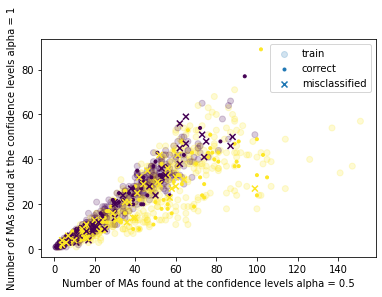

In [ ]:
print("Messidor:\n")
np.random.seed(1232)
y = df2["CONTAINS DR"].to_numpy()
x = df2.drop('CONTAINS DR', 1).to_numpy()

(num_instances, num_features), num_classes = x.shape, np.max(y)+1
inds = np.random.permutation(num_instances)
#train-test split)
split = ceil(num_instances*0.8)
x_tmp, y_tmp = x[inds[:split]], y[inds[:split]]
x_test, y_test = x[inds[split:]], y[inds[split:]]

tree = DecisionTree(max_depth=10, cost_fn=cost_gini_index, min_leaf_instances=1)
probs_test = tree.fit(x_tmp, y_tmp).predict(x_test)
y_pred = np.argmax(probs_test,1)

correct = y_test == y_pred
incorrect = np.logical_not(correct)
plt.scatter(x_tmp[:,2], x_tmp[:,7], c=y_tmp, marker='o', alpha=.2, label='train')
plt.scatter(x_test[correct,2], x_test[correct,7], marker='.', c=y_pred[correct], label='correct')
plt.scatter(x_test[incorrect,2], x_test[incorrect,7], marker='x', c=y_test[incorrect], label='misclassified')
plt.ylabel('Number of MAs found at the confidence levels alpha = 1')
plt.xlabel('Number of MAs found at the confidence levels alpha = 0.5')
plt.legend()
plt.show()

Plotting Graph for Messidor dataset with best hyperparameter found using cross validation

Hepatitis:



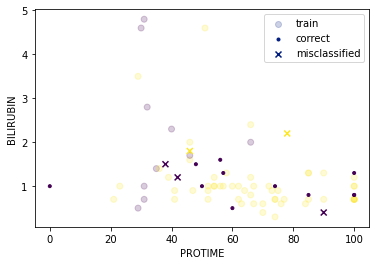

In [ ]:
print("Hepatitis:\n")
np.random.seed(97)
df
y = df["Class"].to_numpy()
x = df.drop('Class', 1).to_numpy()

(num_instances, num_features), num_classes = x.shape, np.max(y)+1
inds = np.random.permutation(num_instances)
#train-test split)
split = ceil(num_instances*0.8)
x_tmp, y_tmp = x[inds[:split]], y[inds[:split]]
x_test, y_test = x[inds[split:]], y[inds[split:]]

tree = DecisionTree(max_depth=3, cost_fn=cost_gini_index, min_leaf_instances=7)
probs_test = tree.fit(x_tmp, y_tmp).predict(x_test)
y_pred = np.argmax(probs_test,1)

correct = y_test == y_pred
incorrect = np.logical_not(correct)
plt.scatter(x_tmp[:,17], x_tmp[:,13], c=y_tmp, marker='o', alpha=.2, label='train')
plt.scatter(x_test[correct,17], x_test[correct,13], marker='.', c=y_pred[correct], label='correct')
plt.scatter(x_test[incorrect,17], x_test[incorrect,13], marker='x', c=y_test[incorrect], label='misclassified')
plt.ylabel('BILIRUBIN')
plt.xlabel('PROTIME')
plt.legend()
plt.show()

Decision Boundary for Messidor

Messidor:



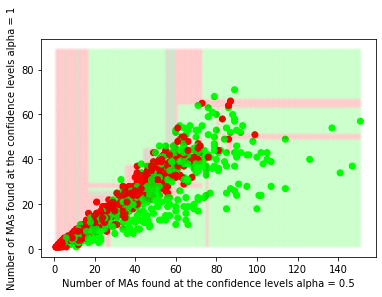

In [ ]:
print("Messidor:\n")
np.random.seed(1232)
y = df2["CONTAINS DR"].to_numpy()
x = df2[['MA ALPHA 0.5', 'MA ALPHA 1']].to_numpy()

(num_instances, num_features), num_classes = x.shape, np.max(y)+1
inds = np.random.permutation(num_instances)
#train-test split)
split = ceil(num_instances*0.8)
x_tmp, y_tmp = x[inds[:split]], y[inds[:split]]
x_test, y_test = x[inds[split:]], y[inds[split:]]

x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 250)
x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 250)

x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

model = DecisionTree(max_depth=10, cost_fn=cost_gini_index, min_leaf_instances=1)
y_train_prob = np.zeros((y_tmp.shape[0], 3))
# print(y_train_prob)
y_train_prob[np.arange(y_tmp.shape[0]), y_tmp] = 1
plt.scatter(x_tmp[:,0], x_tmp[:,1], c=y_train_prob, marker='o', alpha=1)
y_prob_all = model.fit(x_tmp, y_tmp).predict(x_all)
z = np.zeros((len(y_prob_all),1), dtype=np.float64)
added = np.append(y_prob_all, z, axis=1)
plt.scatter(x_all[:,0], x_all[:,1], c=added, marker='.', alpha=.01)
plt.ylabel('Number of MAs found at the confidence levels alpha = 1')
plt.xlabel('Number of MAs found at the confidence levels alpha = 0.5')
plt.show()

Decision Boundary for Hepatitis

Hepatitis:



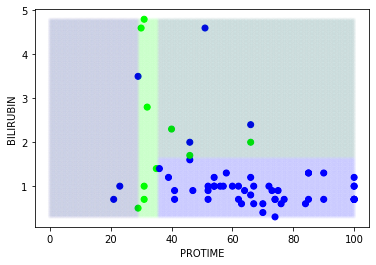

In [ ]:
from math import ceil
print("Hepatitis:\n")
np.random.seed(97)
df
y = df["Class"].to_numpy()
x = df[['PROTIME', 'BILIRUBIN']].to_numpy()

(num_instances, num_features), num_classes = x.shape, np.max(y)+1
inds = np.random.permutation(num_instances)
#train-test split)
split = ceil(num_instances*0.8)
x_tmp, y_tmp = x[inds[:split]], y[inds[:split]]
x_test, y_test = x[inds[split:]], y[inds[split:]]

x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 250)
x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 250)

x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

model = DecisionTree(max_depth=3, cost_fn=cost_gini_index, min_leaf_instances=7)
y_train_prob = np.zeros((y_tmp.shape[0], 3))
# print(y_train_prob)
y_train_prob[np.arange(y_tmp.shape[0]), y_tmp] = 1
plt.scatter(x_tmp[:,0], x_tmp[:,1], c=y_train_prob, marker='o', alpha=1)
y_prob_all = model.fit(x_tmp, y_tmp).predict(x_all)
z = np.zeros((len(y_prob_all),1), dtype=np.float64)
added = np.append(y_prob_all, z, axis=1)
plt.scatter(x_all[:,0], x_all[:,1], c=added, marker='.', alpha=.01)
plt.ylabel('BILIRUBIN')
plt.xlabel('PROTIME')
plt.show()